# **HEART DISEASE PREDICTION USING MACHINE LEARNING**

In this project, I will be looking into the Heart Disease Data Set from UCI data repository, from the dataset I will derive various insights that help us know the weightage of each feature and how they are interrelated to each other with the sole aim of detecting the probability of person to be affected by a heart problem or not.

The Heart Disease prediction project will have the following key takeaways:

1. **Data insight**: As mentioned here we will be working with the heart disease detection dataset and we will be putting out interesting inferences from the data to derive some meaningful results.

2. **EDA**: Exploratory data analysis is the key step for getting meaningful results.

3. **Feature engineering**: After getting the insights from the data we have to alter the features so that they can move forward for the model building phase.

4. **Model building**: In this phase, we will be building our Machine learning model for heart disease detection.

**About the Dataset**

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

**Column Descriptions**:

1. **id**: (Unique id for each patient)
2. **age**: (Age of the patient in years)
3. **origin**: (place of study)
4. **sex**: (Male/Female)
5. **cp**: chest pain type (typical angina, atypical angina, non-anginal, asymptomatic)
6. **trestbps**: resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. **chol**: (serum cholesterol in mg/dl)
8. **fbs**: (if fasting blood sugar > 120 mg/dl)
9. **restecg**: (resting electrocardiographic results)
Values: [normal, stt abnormality, lv hypertrophy]
10. **thalach**: maximum heart rate achieved
11. **exang**: exercise-induced angina (True/ False)
12. **oldpeak**: ST depression induced by exercise relative to rest
13. **slope**: the slope of the peak exercise ST segment
14. **ca**: number of major vessels (0-3) colored by fluoroscopy
15. **thal**: [normal; fixed defect; reversible defect]
16. **num**: the predicted attribute

**Importing the Dependencies & Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [2]:
heart_data = pd.read_csv(r'C:\Users\WCLENG-9\Desktop\Educational Resources\Everything Data Science\Datasets\heart_disease_data.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Exploratory Data Analysis (EDA)**

In [3]:
# size of the dataset
heart_data.shape

(303, 14)

We have a dataset with 303 rows which indicates a smaller set of data, now let’s see the type of each feature that our dataset holds.

In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB




*   Out of 14 features, we have 13 int types and only one with the float data types.
*   Fortunately, this dataset doesn’t hold any missing values.

let’s see how statistically the dataset is spread.



In [5]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


It is always better to check the correlation between the features so that we can analyze that which feature is negatively correlated and which is positively correlated so, Let’s check the correlation between various features.

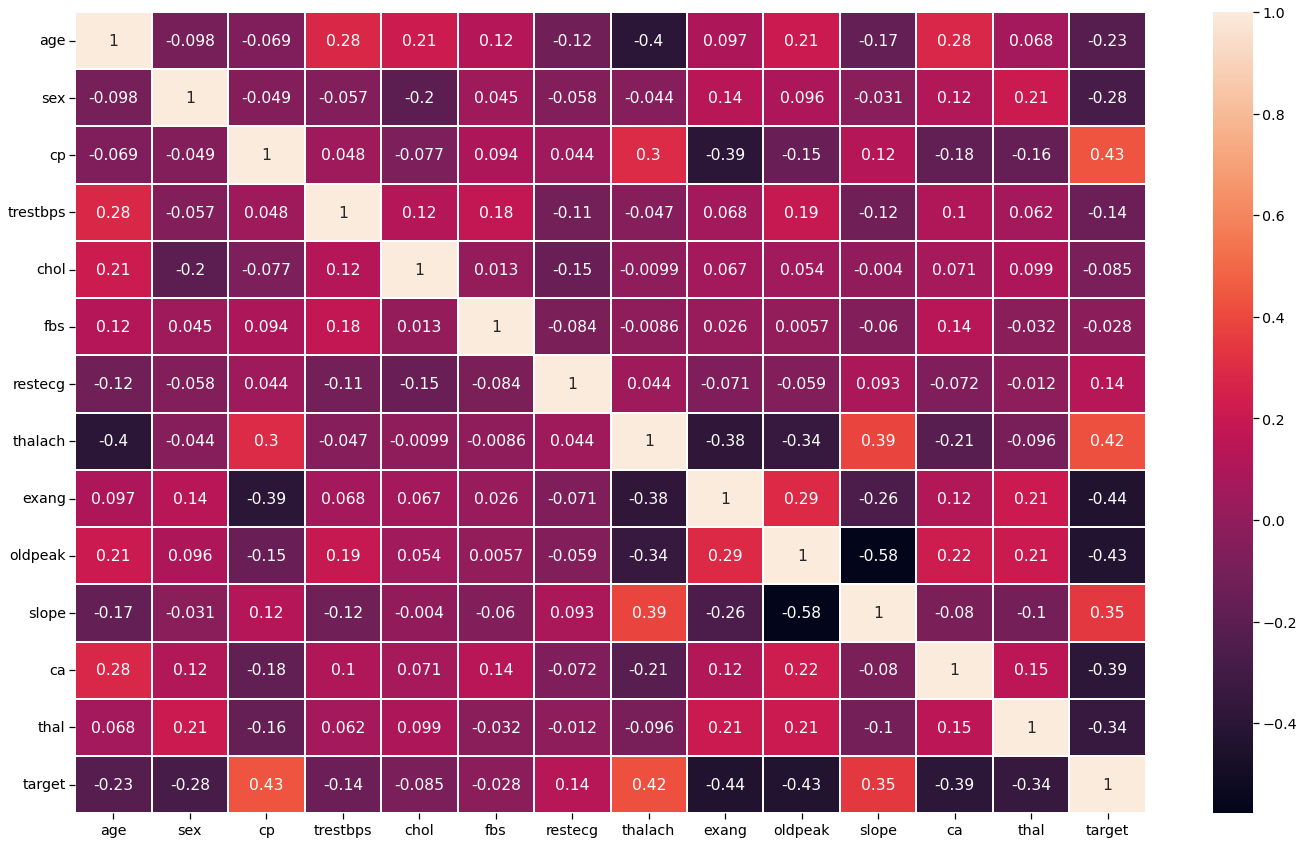

In [6]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(heart_data.corr(),annot=True,linewidth =2)
plt.tight_layout()

It is also a good practice to check the correlation of the target variable.

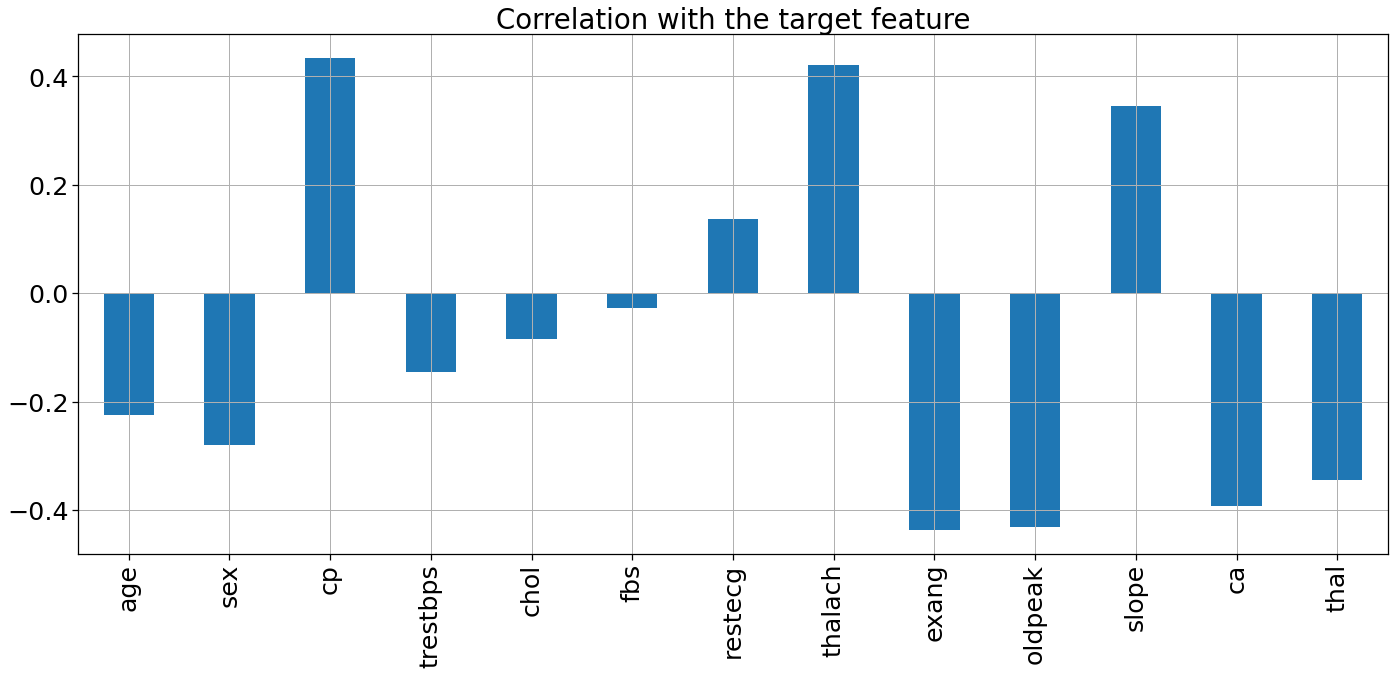

In [7]:
sns.set_context('notebook',font_scale = 2.3)
heart_data.drop('target', axis=1).corrwith(heart_data.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                   title="Correlation with the target feature")
plt.tight_layout()

Insights from the above graph are:

*  Four features ( “cp”, “restecg”, “thalach”, “slope” ) are positively correlated with the target feature.
*  Other features are negatively correlated with the target feature.

So, we have done enough collective analysis now let’s go for the analysis of the individual features which comprises both univariate and bivariate analysis.

**Age(“age”) Analysis**

Here we will be checking the 10 ages and their counts.

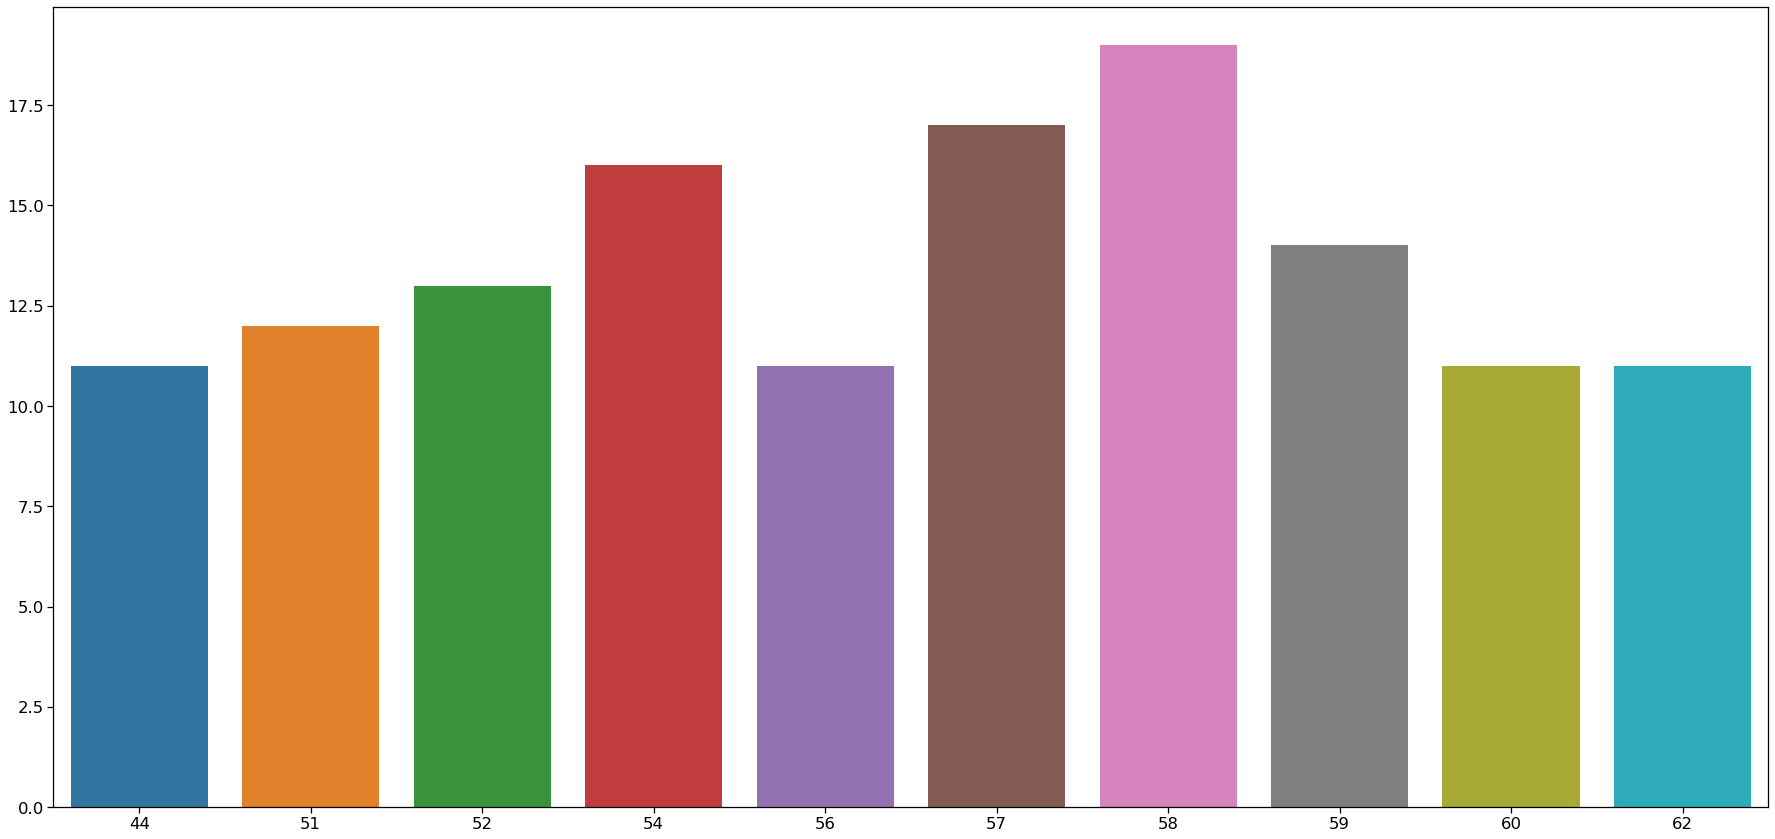

In [8]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=heart_data.age.value_counts()[:10].index,y=heart_data.age.value_counts()[:10].values)
plt.tight_layout()

Here we can see that the 58 age column has the highest frequency.

Let’s check the range of age in the dataset.

In [9]:
minAge=min(heart_data.age)
maxAge=max(heart_data.age)
meanAge=heart_data.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


We should divide the Age feature into three parts – “Young”, “Middle” and “Elder”

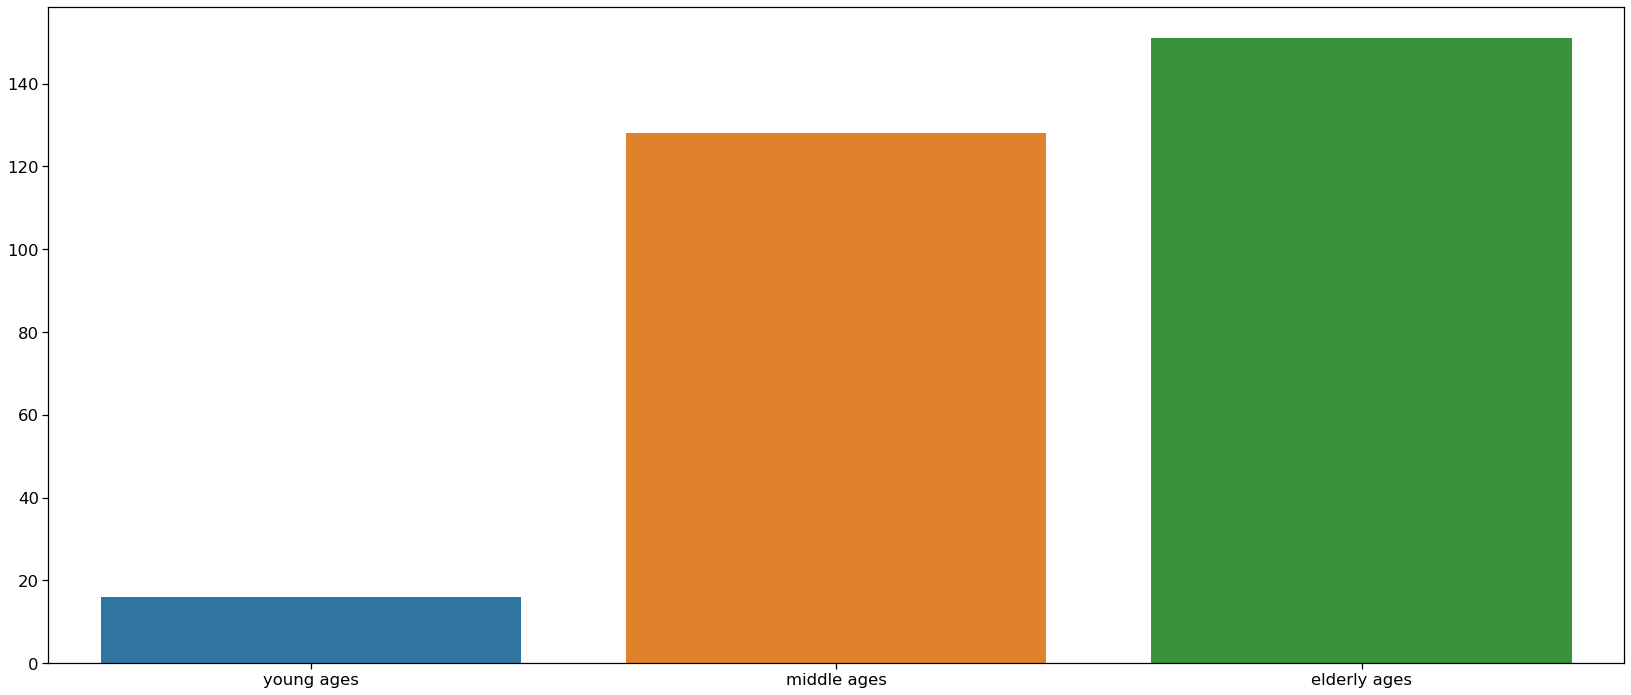

In [10]:
Young = heart_data[(heart_data.age>=29)&(heart_data.age<40)]
Middle = heart_data[(heart_data.age>=40)&(heart_data.age<55)]
Elder = heart_data[(heart_data.age>55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

Here we can see that elder people are the most affected by heart disease and young ones are the least affected. To prove the above inference we will plot the pie chart.

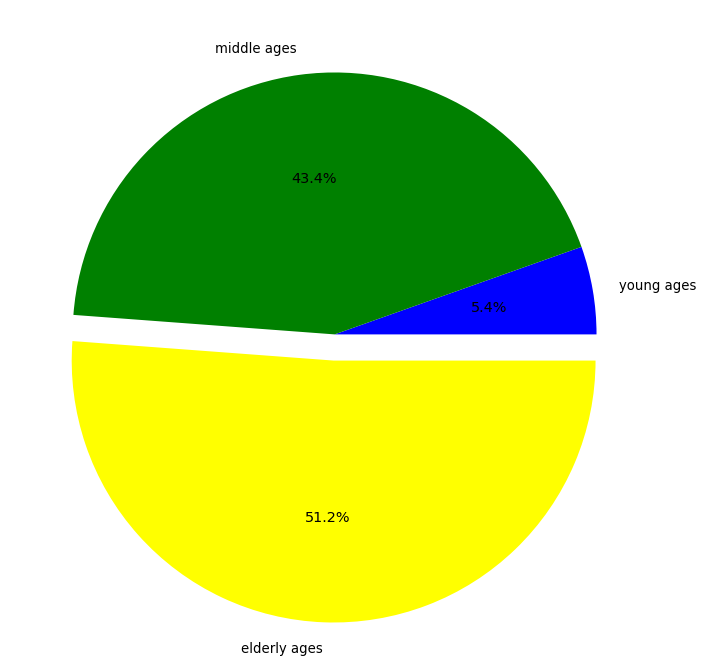

In [11]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

**Sex(“sex”) Feature Analysis**

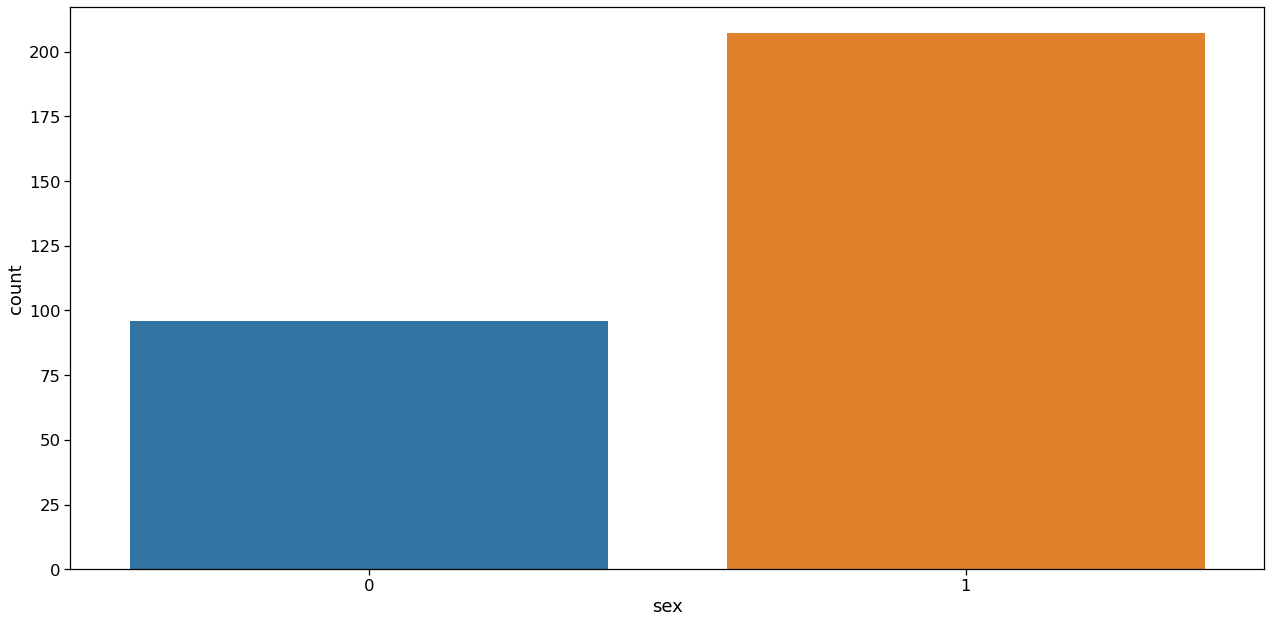

In [12]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(x=heart_data['sex'])
plt.tight_layout()

From the plot above I got to understand that the ratio of Male to Female is approx 2:1, now let's plot the relation between sex and slope.

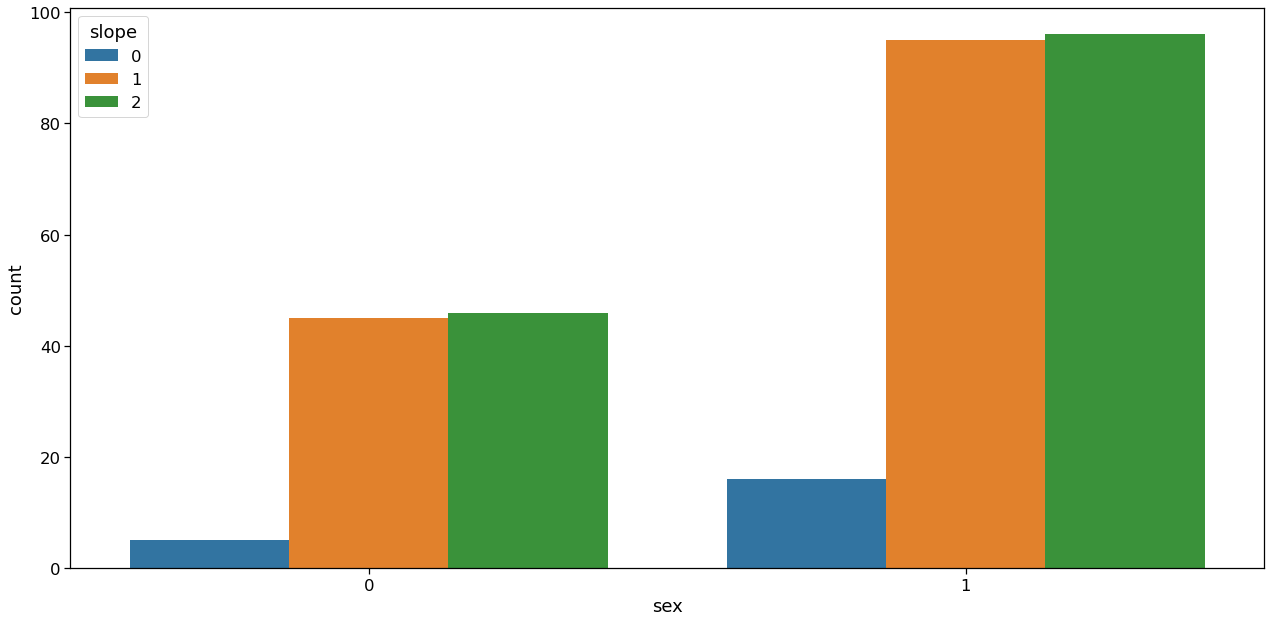

In [13]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(x=heart_data['sex'],hue=heart_data["slope"])
plt.tight_layout()

It is clearly visible that the slope value is higher in the case of males(1).

**Plotting the relationship between sex and target.**

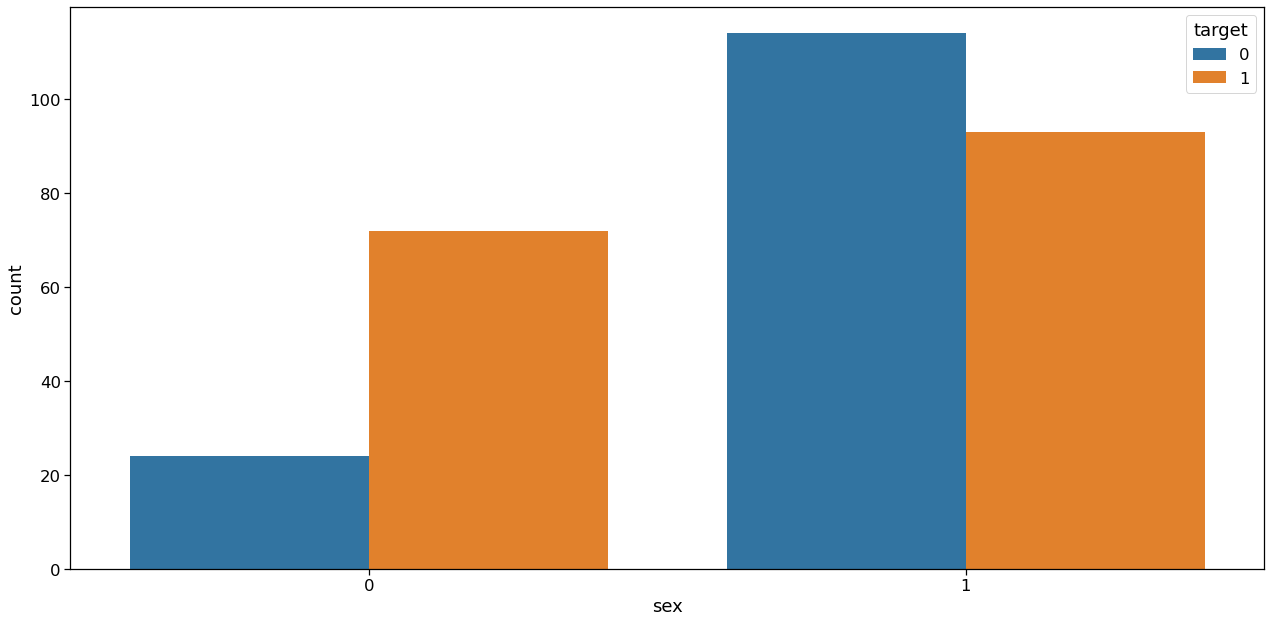

In [14]:
# plotting the relation between sex and target.

plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(x=heart_data['sex'],hue=heart_data["target"])
plt.tight_layout()

Males are more likely to have heart disease than Female

**Chest Pain Type(“cp”) Analysis**

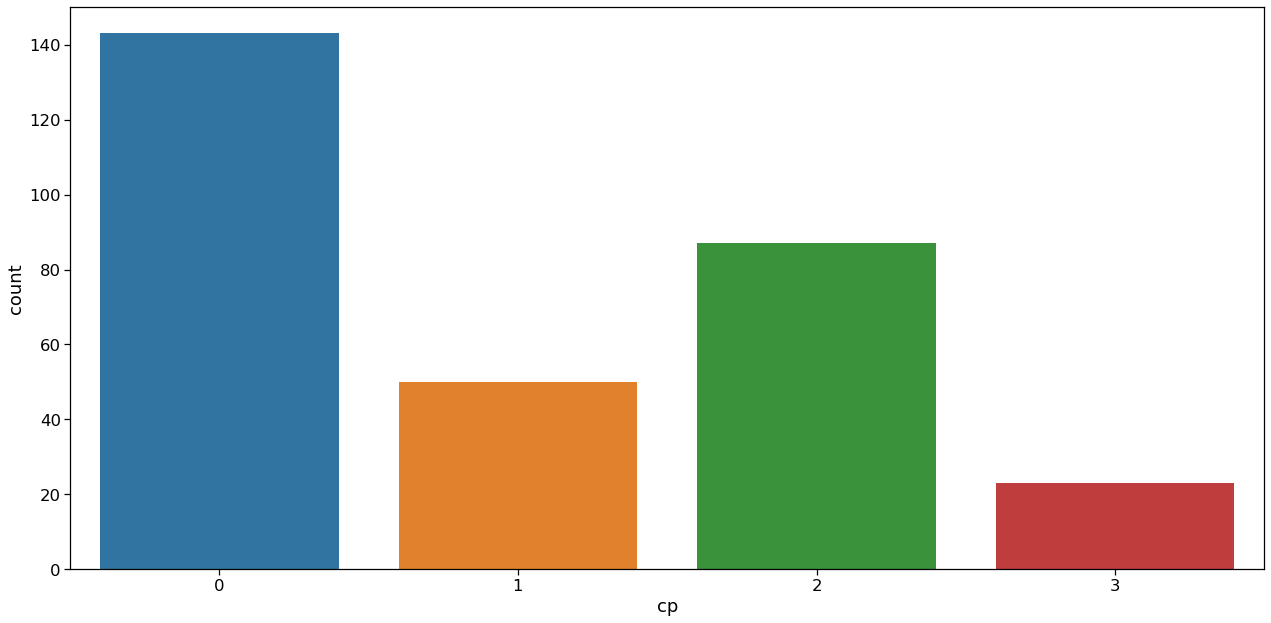

In [15]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(x=heart_data['cp'])
plt.tight_layout()

As seen, there are 4 types of chest pain

1. status at least
2. condition slightly distressed
3. condition medium problem
4. condition too bad

**Analyzing cp vs target column**

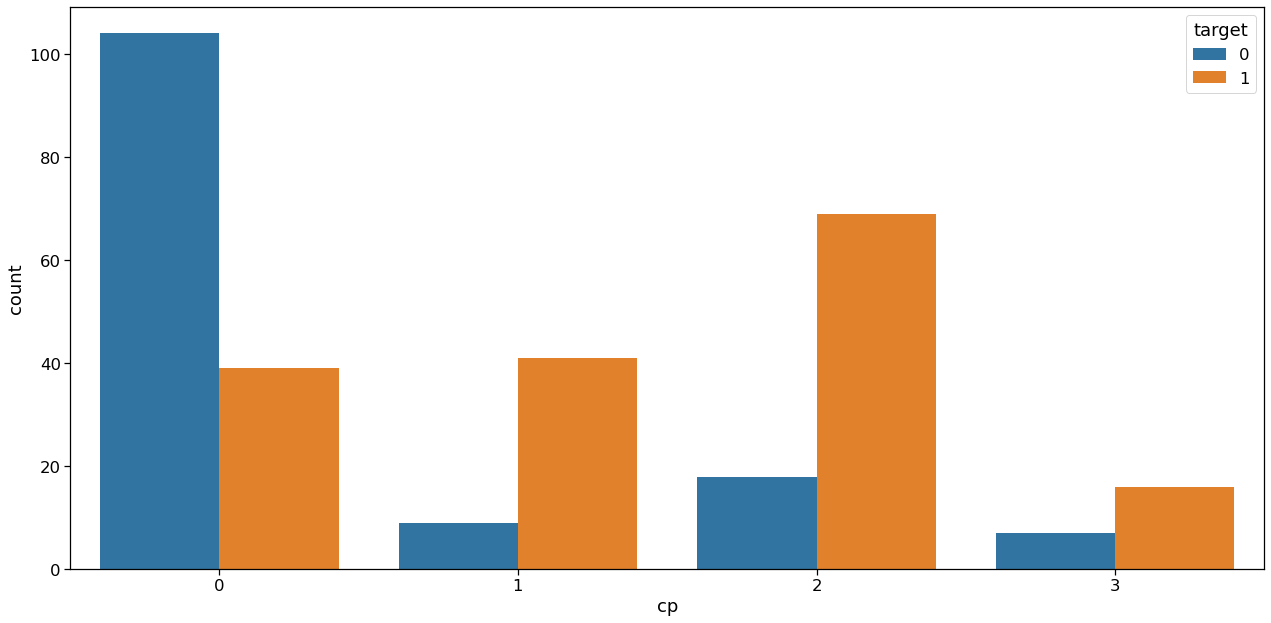

In [16]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(x=heart_data['cp'],hue=heart_data["target"])
plt.tight_layout()

From the above graph we can make some inferences,

* People having the least chest pain are not likely to have heart disease.
* People having severe chest pain are likely to have heart disease.
* Elderly people are more likely to have chest pain.

**Thal Analysis**

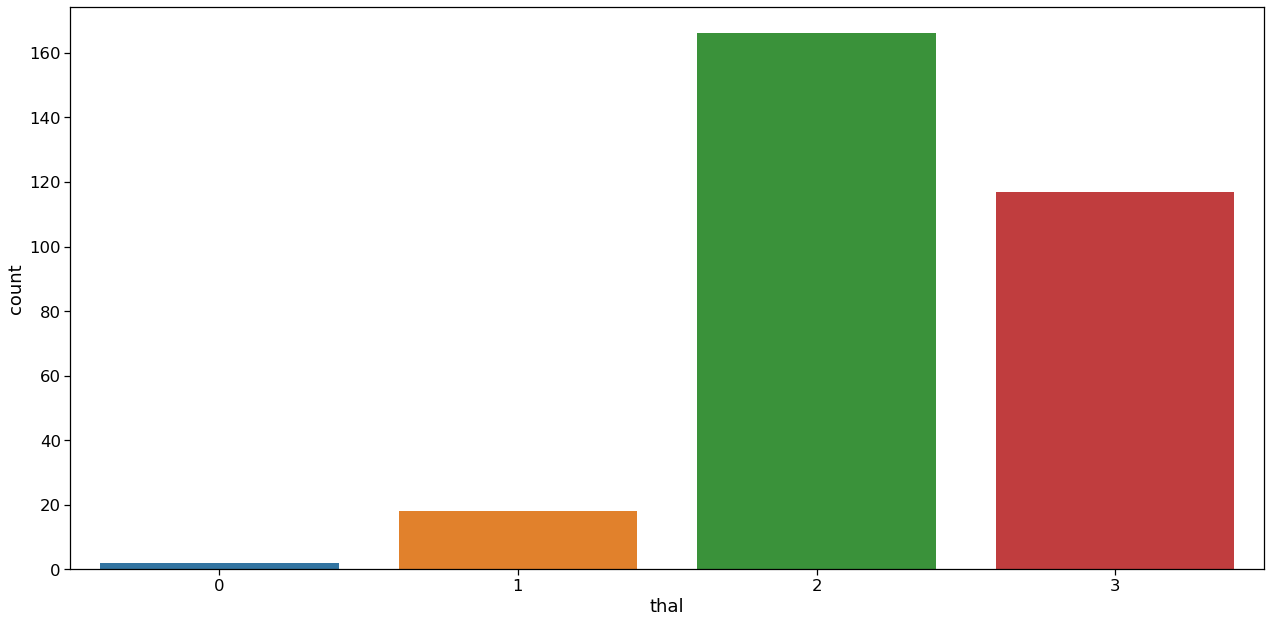

In [17]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(x=heart_data['thal'])
plt.tight_layout()

**Analyzing Thal vs target column**

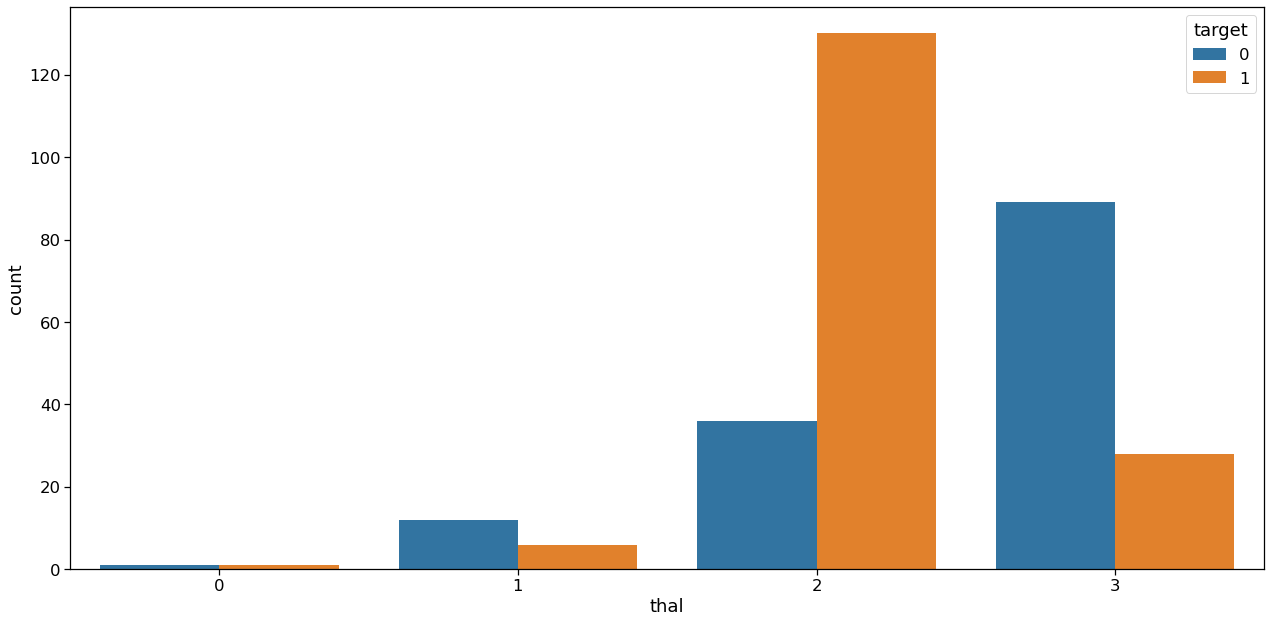

In [18]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(x=heart_data['thal'],hue=heart_data["target"])
plt.tight_layout()

People with fixed defect are more likely to have heart disease.

**Target**

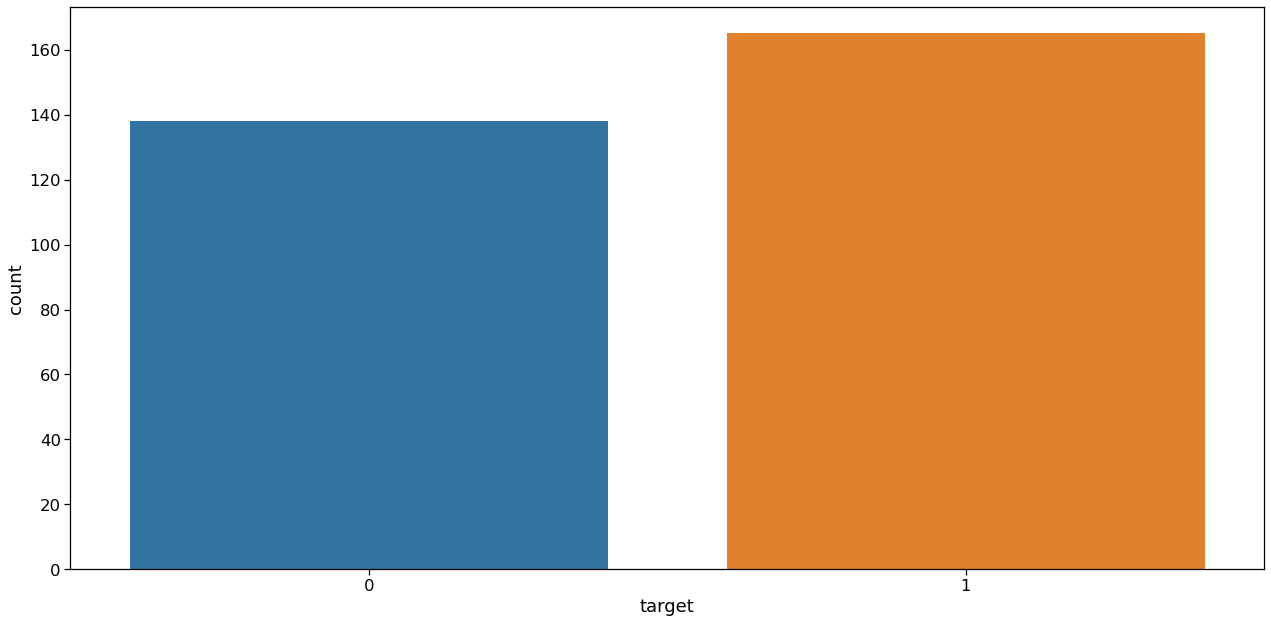

In [19]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(x=heart_data['target'])
plt.tight_layout()

The ratio between 1 and 0 is much less than 1.5 which indicates that the target feature is not imbalanced. So for a balanced dataset, we can use accuracy_score as evaluation metrics for our model.

## **Feature Enginnering**

In [20]:
categorical_val = []
continous_val = []
for column in heart_data.columns:
    print("--------------------")
    print(f"{column} : {heart_data[column].unique()}")
    if len(heart_data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

--------------------
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
--------------------
sex : [1 0]
--------------------
cp : [3 2 1 0]
--------------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
--------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 34

In [21]:
X = heart_data.drop(columns = 'target', axis = 1)
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [22]:
y = heart_data['target']
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


## **Building the Model**

We'll start by splitting the dataset

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 4)
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
207,60,0,0,150,258,0,0,157,0,2.6,1,2,3
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2


I will be working on following algorithms

* KNN
* Random Forest Classifier
* XGBoost
* CatBoost

## **KNN**

In [24]:
knn = KNeighborsClassifier(n_neighbors = 10)

In [25]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [26]:
y_pred1 = knn.predict(X_test)

In [53]:
print(accuracy_score(y_test,y_pred1)*100)

75.40983606557377


In [28]:
# Hyperparameter Optimization

test_score = []
neighbors = range(1, 25)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

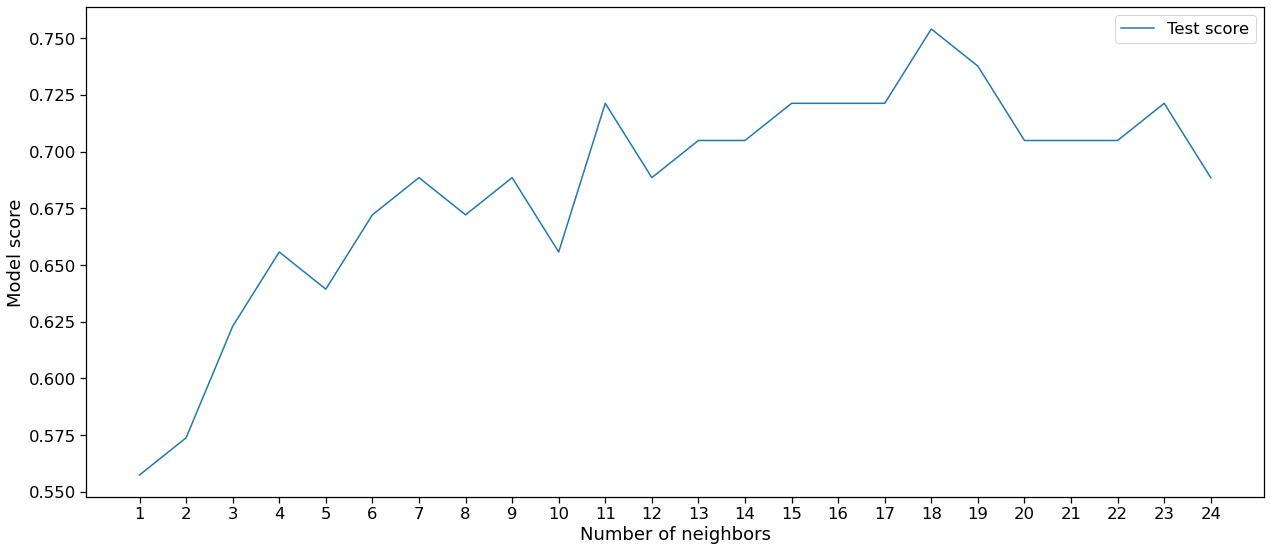

In [29]:
plt.figure(figsize=(18, 8))
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 25, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.tight_layout()

At K = 18, we are getting highest test accuracy.

In [30]:
knn = KNeighborsClassifier(n_neighbors = 18)

In [31]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=18)

In [32]:
y_pred1 = knn.predict(X_test)

In [54]:
print(accuracy_score(y_test,y_pred1)*100)

75.40983606557377


The model achieved an accuracy of 75% with KNN Model after Hyperparameter Optimization.

### **Random Forest Classifier**

In [34]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred2 = rfc.predict(X_test)

In [55]:
print(accuracy_score(y_test,y_pred2)*100)

86.88524590163934


In [36]:
## Hyperparameter Optimization

max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)

params2 ={
    
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)], 
    'max_features': ['auto', 'sqrt'],
    'max_depth': max_depth, 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 
    'bootstrap': [True, False]
}

In [37]:
rfc = RandomForestClassifier(random_state=4)

rfcs = RandomizedSearchCV(estimator=rfc, param_distributions=params2, n_iter=100, cv=5, verbose=2, random_state=4, n_jobs=-1)

In [38]:
rfcs.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=4),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=4, verbose=2)

In [39]:
rfcs.best_estimator_

RandomForestClassifier(max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=200, random_state=4)

In [52]:
y_pred2 = rfcs.predict(X_test)
print(accuracy_score(y_test,y_pred2)*100)

86.88524590163934


The model achieved an accuracy of 86% with the Random Forest Classifier Model. There was no improvement after Hyperparameter Optimization.

## **XGBoost**

In [41]:
xgb = XGBClassifier(random_state = 4)
xgb.fit(X_train,y_train)
y_pred3 = xgb.predict(X_test)

In [56]:
print(accuracy_score(y_test,y_pred3)*100)

83.60655737704919


The model achieved an accuracy of 83% with the XGBoost Classifier Model.

## **CatBoost**

In [43]:
model4 = CatBoostClassifier(random_state=4)

In [44]:
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)

Learning rate set to 0.005621
0:	learn: 0.6890803	total: 176ms	remaining: 2m 55s
1:	learn: 0.6844927	total: 179ms	remaining: 1m 29s
2:	learn: 0.6793185	total: 182ms	remaining: 1m
3:	learn: 0.6747796	total: 185ms	remaining: 46.1s
4:	learn: 0.6709855	total: 188ms	remaining: 37.4s
5:	learn: 0.6674823	total: 191ms	remaining: 31.6s
6:	learn: 0.6634359	total: 193ms	remaining: 27.4s
7:	learn: 0.6594259	total: 196ms	remaining: 24.2s
8:	learn: 0.6554524	total: 198ms	remaining: 21.8s
9:	learn: 0.6527306	total: 200ms	remaining: 19.8s
10:	learn: 0.6491692	total: 203ms	remaining: 18.2s
11:	learn: 0.6450877	total: 205ms	remaining: 16.9s
12:	learn: 0.6414086	total: 208ms	remaining: 15.8s
13:	learn: 0.6381966	total: 211ms	remaining: 14.8s
14:	learn: 0.6342642	total: 213ms	remaining: 14s
15:	learn: 0.6316462	total: 216ms	remaining: 13.3s
16:	learn: 0.6282086	total: 219ms	remaining: 12.7s
17:	learn: 0.6241765	total: 222ms	remaining: 12.1s
18:	learn: 0.6208047	total: 224ms	remaining: 11.6s
19:	learn: 0.6

In [57]:
print(accuracy_score(y_test,y_pred4)*100)

86.88524590163934


The model achieved an accuracy of 86% with the CatBoost Classifier Model.

## **Logistic Regression**

In [46]:
model = LogisticRegression()

In [47]:
# training the LogisticRegression model with the Training data
model.fit(X_train,y_train)

C:\Users\WCLENG-9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [48]:
y_pred5 = model.predict(X_test)

In [58]:
print(accuracy_score(y_test,y_pred5)*100)

88.52459016393442


The model achieved an accuracy of 88% with the Logistic Regression Model.

## **Putting it all together**

In [51]:
input_data = (56, 1, 1, 120, 236, 0, 1, 178, 0, 0.8, 2, 0, 2)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshaping the numpy array as I am predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[1]


C:\Users\WCLENG-9\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



## **Conclusion on Heart Disease Prediction**

1. I did data visualization and data analysis of the target variable, age features, and whatnot along with its univariate analysis and bivariate analysis.

2. I also did a complete feature engineering part in this project which sums up all the valid steps needed for further steps i.e. model building.

3. From the above model accuracy,the LogisticRegression Model gave me an accuracy of 88% which is the highest accuracy compared to other models.